# 수치 적분

**실습을 시작하기 전에, 메뉴의 [런타임]-[런타임 유형 변경]에서 '하드웨어 가속기'를 'CPU'로 선택해야 한다.**

이번 실습에서는 함수의 적분값을 계산해 보겠다.

우리가 해결해야 할 문제는 다음과 같다.

경주용 보트의 돛대에 작용하는 힘은 **식 (1)**과 같이 표현된다:

$$
f\left(z\right)=200\left(\frac{z}{5+z}\right)e^{-\frac{2z}{H}}\tag{1}
$$

여기서, $z$는 갑판 위의 높이이고, $H$는 돛대의 높이다. 돛대에 작용하는 전체 힘 $F$는 돛대의 높이에 걸쳐 이 함수를 적분하여 계산할 수 있다:

$$
F\left(H\right)=\int_{0}^{H}f\left(z\right)dz\tag{2}
$$

이번 실습에서는 $H=30$인 경우에 대해 힘 $F$를 계산해 보겠다.

먼저 필요한 모듈을 불러온다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 함수 정의

우선 **식 (1)**의 함수 $f(z)$를 파이썬의 함수로 정의한다.  우리가 구현해야 할 함수 $f(z)$는 입력으로 변수 $z$를 받아서 **식 (1)**을 계산해야 한다.

**지시: 식 (1)을 파이썬 함수로 구현하는 아래의 함수 *func*를 완성하시오.**

In [ ]:
def func(z):
  #### 코드 시작 ####
  ## 방법) 식 (1)을 파이썬 코드로 작성하시오.
  f = 0
  #### 코드 종료 ####
  return f

위에 만든 함수 *func*를 테스트 한다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
f = func(np.array([1, 2]))

assert abs(f[0] - 31.1836) < 0.0001
assert abs(f[1] - 50.0099) < 0.0001

print("성공!!")

## 함수의 그래프 출력

이번에는 함수 $f(z)$를 그래프로 출력해 보겠다.

In [ ]:
z = np.linspace(0, 30, 100) # z를 100개의 구간으로 나눈다.
f = func(z) # z에 대해 식 (1)을 계산한다.

_, ax = plt.subplots()
ax.plot(z, f)
ax.grid()
ax.set_xlabel('z')
ax.set_ylabel('f(z)')
ax.plot()

위의 그래프는 $f(z)$, 즉, **식 (1)**을 출력한 것으로, 높이에 따른 힘의 분포를 보여준다. 궁극적으로 우리는 **식 (2)**를 계산해야 하므로, 함수 $f(z)$의 아래 부분의 면적을 계산하게 된다.

## 합성 사다리꼴 공식 구현

**식 (2)**의 적분을 계산하기 위해 합성 사다리꼴 공식을 구현할 것이다. 합성 사다리꼴 공식을 정리하면 다음과 같다.

**합성 사다리꼴 공식**
$$
I=\int_{a}^{b}f\left(x\right)dx=\frac{b-a}{2n}\left[f\left(x_0\right)+2\sum_{i=1}^{n-1}f\left(x_i\right)+f\left(x_n\right)\right]=\left(b-a\right)\frac{f\left(x_0\right)+2\sum_{i=1}^{n-1}f\left(x_i\right)+f\left(x_n\right)}{2n}
$$

여기서, $n$은 구간의 개수이며, 각 점들 $x_i$는 다음과 같이 계산한다:

$$
x_0=a,\ x_1=x_0+h,\ x_2=x_1+h,\ \ldots,\ x_n=b
$$

여기서,
$$
h=\frac{b-a}{n}
$$
이다.

**STEP 1:** 구간의 크기 $h$를 계산한다.

**STEP 2:** $f\left(x_0\right)$를 계산하여 변수 $I$에 저장한다.

**STEP 3:** $2\sum_{i=1}^{n-1}f\left(x_i\right)$를 계산하여 변수 $I$에 더한다.

**STEP 4:** $f\left(x_n\right)$를 계산하여 변수 $I$에 더한다.

**STEP 5:** $I$에 $(b-a)$를 곱하고, $2n$으로 나눈다.


**지시: 위의 알고리즘을 참고하여, 합성 사다리꼴 공식을 구현하는 함수 *trap*을 완성하시오.**

In [ ]:
def trap(func, a, b, n):
  '''
  함수 trap은 합성 사다리꼴 공식을 구현한다.
  입력 매개변수:
    f : 방정식 f(x)를 나타내는 함수
    a, b : 적분 구간 [a, b]
    n : 적분 구간의 수
  출력 매개변수
    I : 적분 값
  '''

  if b <= a: return 'upper bound must be greater than lower bound'

  # STEP 1: 구간의 크기 h를 계산한다.
  ## 방법) a, b, n을 이용해 구간 크기를 계산하여 h에 저장한다.
  #### 코드 시작 ####
  h = 1
  #### 코드 종료 ####

  # STEP 2: f(x_0)를 계산하여 변수 I에 저장한다.
  x = a
  I = func(a)

  # STEP 3: 2*(f(x_1)+f(x_2)+...+f(x_n-1))을 계산하여 변수 I에 더한다.
  for i in range(n - 1):
    x = x + h
    ## 방법) 각 x에 대해 2*f(x_i)를 계산하여 I에 더한다.
    #### 코드 시작 ####
    I = I
    #### 코드 종료 ####

  # STEP 4: f(x_n)를 계산하여 변수 I에 저장한다.
  I = I + func(b)

  # STEP 5: I에 (b-a)를 곱하고, 2n으로 나눈다.
  #### 코드 시작 ####
  I = I
  #### 코드 종료 ####

  return I

방금 완성한 *trap* 함수를 이용해 **식 (2)**를 계산해 보겠다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
I1 = trap(func, 0, 30, 6)
print("I=", I1)

assert abs(I1 - 1402.7282) < 0.0001

print("성공!!")

여기서는, 전체 구간을 $n=6$ 개로 나누어 합성 사다리꼴 공식을 적용하였다.

## 합성 Simpson 1/3 공식 구현

**식 (2)**의 적분을 계산하기 위해 합성 Simpson 1/3 공식을 구현할 것이다. 합성 Simpson 1/3 공식을 정리하면 다음과 같다.

**Simpson 1/3 공식**

$$
I=\int_{a}^{b}f\left(x\right)dx=\left(b-a\right)\frac{f\left(x_0\right)+4\sum_{i=1,3,5}^{n-1}f\left(x_i\right)+2\sum_{j=2,4,6}^{n-2}f\left(x_j\right)+f\left(x_n\right)}{3n}
$$

여기서, $n$은 구간의 개수이며, 각 점들 $x_i$는 다음과 같이 계산한다.
$$
x_0=a,\ x_1=x_0+h,\ x_2=x_1+h,\ \ldots,\ x_n=b
$$
여기서,
$$
h=\frac{b-a}{n}
$$
이다.

**STEP 1:** 구간의 크기 $h$를 계산한다.

**STEP 2:** $f\left(x_0\right)$를 계산하여 변수 $I$에 저장한다.

**STEP 3:** $4\sum_{i=1,3,5}^{n-1}f\left(x_i\right)$를 계산하여 변수 $I$에 더한다.

**STEP 4:** $2\sum_{j=2,4,6}^{n-2}f\left(x_i\right)$를 계산하여 변수 $I$에 더한다.

**STEP 5:** $f\left(x_n\right)$를 계산하여 변수 $I$에 더한다.

**STEP 6:** $I$에 $(b-a)$를 곱하고, $3n$으로 나눈다.

**지시: 위의 알고리즘을 참고하여, 합성 Simpson 1/3 공식을 구현하는 함수 *simpson*을 완성하시오.**

In [ ]:
def simpson(f, a, b, n):
  '''
  함수 simpson은 Simpson 1/3 공식을 구현한다.
  입력 매개변수:
    f : 방정식 f(x)를 나타내는 함수
    a, b : 적분 구간 [a, b]
    n : 적분 구간의 수
  출력 매개변수:
    I : 적분 값
  '''

  # STEP 1: 구간의 크기 h를 계산한다.
  ## 방법) a, b, n을 이용해 구간 크기를 계산하여 h에 저장한다.
  #### 코드 시작 ####
  h = 1
  #### 코드 종료 ####

  # STEP 2: f(x_0)를 계산하여 변수 I에 저장한다.
  x = a
  I = f(a)

  # STEP 3: 4*(f(x_1)+f(x_3)+...+f(x_n-1))을 계산하여 변수 I에 더한다.
  ## 방법) x_1, x_3, ..., x_n-1을 올바르게 계산하기 위해 range()의 값을 수정한다.
  #### 코드 시작
  for i in range(1, n):
  #### 코드 종료
    x = a + h * i
    I = I + 4 * f(x)

  # STEP 4: 2*(f(x_2)+f(x_4)+...+f(x_n-2))을 계산하여 변수 I에 더한다.
  ## 방법) x_2, x_4, ..., x_n-2을 올바르게 계산하기 위해 range()의 값을 수정한다.
  #### 코드 시작
  for i in range(1, n):
  #### 코드 종료
    x = a + h * i
    I = I + 2 * f(x)

  # STEP 5: f(x_n)를 계산하여 변수 I에 저장한다.
  I = I + f(b)

  # STEP 6: I에 (b-a)를 곱하고, 3n으로 나눈다.
    #### 코드 시작 ####
  I = I
  #### 코드 종료 ####

  return I

방금 완성한 *simpson* 함수를 이용해 **식 (2)**를 계산해 보겠다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
I2 = simpson(func, 0, 30, 6)
print("I=", I2)

assert abs(I2 - 1462.8665) < 0.0001

print("성공!!")

## Gauss 구적법

**식 (2)**의 적분을 계산하기 위해 Gauss 구적법을 구현할 것이다. Gauss 구적법을 정리하면 다음과 같다.

**Gauss 구적법**

$$
\begin{align}
I &= \int_{a}^{b}f\left(x\right)dx
\\ &= \int_{-1}^{1}{f\left(\frac{\left(b+a\right)+\left(b-a\right)x_d}{2}\right)\cdot\frac{b-a}{2}dx_d}
\\ &= c_0f\left(x_0\right)+c_1f\left(x_1\right)+\ldots+c_{n-1}f\left(x_{n-1}\right)
\end{align}
$$

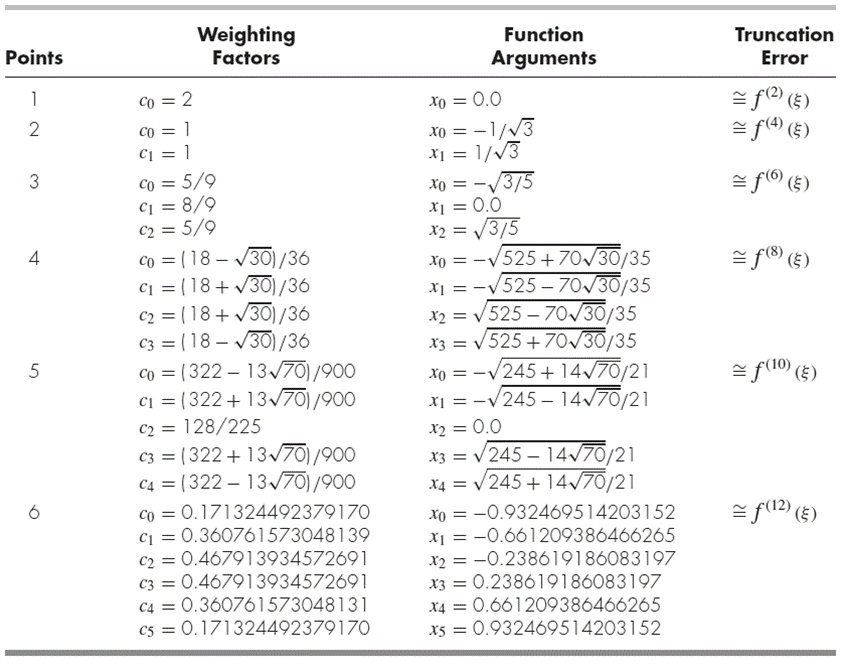

**지시: 위의 Gauss 구적법 식을 참고하여, 3점 Gauss 구적법을 구현한 *quad3*을 완성하시오.**

In [ ]:
def quad3(f, a, b):
  '''
  함수 quad3은 3점 Gauss 구적법을 구현한다.
  입력 매개변수:
    f : 방정식 f(x)를 나타내는 함수
    a, b : 적분 구간 [a, b]
  출력 매개변수:
    I : 적분 값
  '''

  # 적분 위치 xd
  xd = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
  # 적분 위치에서의 가중치
  c = np.array([5/9, 8/9, 5/9])

  # 적분 위치를 [a, b]의 범위로 변환
  # 방법) Gauss 구적법을 참고하여 xd를 x로 변환하는 식을 완성하시오.
  #### 코드 시작 ####
  xi = xd
  #### 코드 종료 ####

  # 적분 위치에서 c * f(x_i) 계산
  cf = c * f(xi) * (b - a) / 2
  # 모든 cf를 더한다.
  I = np.sum(cf)

  return I

방금 완성한 *quad3* 함수를 이용해 **식 (2)**를 계산해 보겠다. 아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
I3 = quad3(func, 0, 30)
print("I=", I3)

assert abs(I3 - 1510.3329) < 0.0001

print("성공!!")

## trapz 함수 이용

Numpy에는 사다리꼴 공식을 [np.trapz](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html) 함수로 구현해 놓았다. 이번에는 [np.trapz](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html) 함수를 이용해 **식 (2)**의 적분을 계산하겠다.

**지시: trapz 함수를 이용해 식 (2)를 계산하는 코드를 완성하시오.**

In [ ]:
z = np.linspace(0, 30, 100) # z를 100개의 구간으로 나눈다.
f = func(z) # z에 대해 식 (1)을 계산한다.

# 방법) np.trapz를 이용해 식 (2)를 계산하시오.
#### 코드 시작 ####
I4 = np.trapz(0, 0)
#### 코드 종료 ####

print("I=", I4)

아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
assert abs(I4 - 1480.2516) < 0.0001

print("성공!!")

## quad 함수 이용

SciPy에는 Gauss 구적법을 [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) 함수로 구현해 놓았다. 이번에는 [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) 함수를 이용해 **식 (2)**의 적분을 계산하겠다.

**지시: quad 함수를 이용해 식 (2)를 계산하는 코드를 완성하시오.**

In [ ]:
from scipy.integrate import quad

# 방법) quad를 이용해 식 (2)를 계산하시오.
#### 코드 시작 ####
I5, _ = quad(0, 0, 0)
#### 코드 종료 ####

print("I=", I5)

아무 문제가 없다면 아래 코드 실행 시 "**성공**"이라고 출력되어야 한다.

In [ ]:
assert abs(I5 - 1480.5685) < 0.0001

print("성공!!")

수고하셨습니다.